In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob, os, datetime
import statsmodels.api as sm

/Users/skilbjo/.virtualenvs/lisp/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
path = './data/sleep'                  
all_files = glob.glob(os.path.join(path, "./*/*.csv"))

df_from_each_file = (pd.read_csv(f,header=1) for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)
df.loc[:,'date'] = [datetime.datetime.strptime(v,'%Y-%m-%d %I:%M%p').date() for v in df['End Time']]
df.loc[:,'hours'] = df['Minutes Asleep']/60

In [3]:
df.head()

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,date,hours
0,2015-11-30 2:22AM,2015-11-30 8:39AM,354,23,1,377,NaN,NaN,NaN,2015-11-30,5.900000
1,2015-11-29 11:34PM,2015-11-30 2:19AM,154,6,0,165,NaN,NaN,NaN,2015-11-30,2.566667
2,2015-11-29 12:13AM,2015-11-29 8:53AM,489,26,0,520,NaN,NaN,NaN,2015-11-29,8.150000
3,2015-11-28 12:26PM,2015-11-28 1:39PM,67,6,1,73,NaN,NaN,NaN,2015-11-28,1.116667
4,2015-11-28 2:10AM,2015-11-28 8:45AM,382,10,0,395,NaN,NaN,NaN,2015-11-28,6.366667


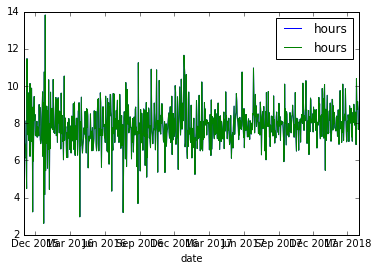

In [4]:
fig, ax = plt.subplots()
df1 = df[['date','hours']]
df1 = df1.groupby(['date'], as_index=False).agg('sum')
df1.plot(x='date',y='hours',ax=ax)
model = sm.formula.ols(formula='hours ~ date', data=df1)
res = model.fit()
df1.assign(fit=res.fittedvalues).plot(x='date', y='hours', ax=ax)

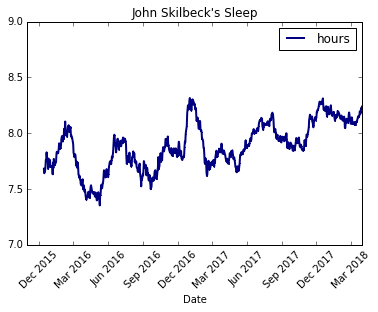

In [91]:
df2 = df[['date','hours']]
df2 = df2.groupby(['date'], as_index=False).agg('sum')
periods = 45
result = df2.rolling(periods, min_periods=periods).mean()
result
title='John Skilbeck\'s Sleep'
result.plot(colormap='jet',
            kind='line',
            lw=2,
            marker='.',
            markersize=1,
            ylim=(7,9),
            x='date',
            y='hours',
            title=title,
            rot=45
           ).set_xlabel('Date')

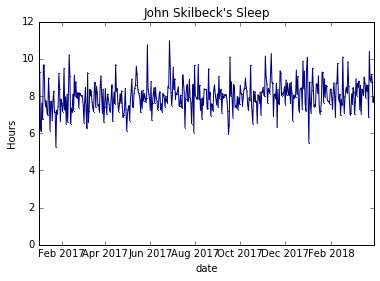

In [33]:
result = df.groupby(['date'])['Minutes Asleep'].sum()/60
title='John Skilbeck\'s Sleep'
result.plot(colormap='jet',
            kind='line',
            lw=1,
            marker='.',
            markersize=1,
            ylim=(0,12),
            xlim=('2017-01-01','2018-03-31'),
            title=title).set_ylabel('Hours')
# plt.savefig('/Users/skilbjo/Desktop/sleep.png',dpi=300)

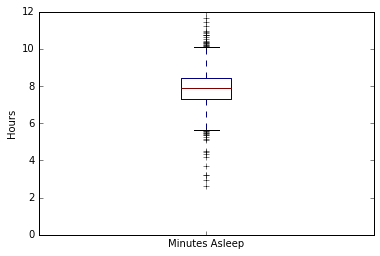

In [7]:
result.plot(colormap='jet',
            kind='box',
            ylim=(0,12)).set_ylabel('Hours')

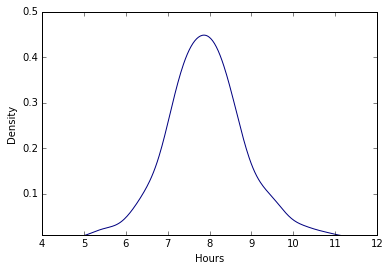

In [8]:
result.plot(colormap='jet',
            kind='kde',
            ylim=(0.01,0.5),
            xlim=(4,12)).set_xlabel('Hours')